#**Predicting Length of Stay for Hospital patients**

In [2]:
import pandas as pd
df = pd.read_csv('Health care.csv')


C:\Users\srava\AppData\Local\Temp\ipykernel_8616\4291831520.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Health care.csv')


In [3]:
display(df)

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,NaN,NaN,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,3185.87,3167.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Private Health Insurance,0,N,Y,43494.00,5588.26
2346927,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,117,M,White,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,NaN,NaN,0,N,Y,16662.00,2907.62
2346928,NaN,NaN,NaN,NaN,Redacted for Confidentiality,50 to 69,NaN,M,White,Unknown,...,Minor,Medical,Medicaid,NaN,NaN,0,N,N,7142.00,1692.55
2346929,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Blue Cross/Blue Shield,0,N,Y,13070.00,2447.75


In [4]:
df.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [56]:
df.describe()

,Operating Certificate Number,Facility Id,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight,Total Charges,Total Costs
count,2.358060e+05,235806.000000,236275.0,236275.000000,236275.000000,236274.000000,236274.000000,236274.000000,236274.000000,2.362740e+05,2.362740e+05
mean,1.775765e+06,511.517396,2015.0,187.139118,89.111772,412.560045,10.292068,2.064679,330.985212,2.512160e+04,1.117626e+04
std,8.891378e+05,843.425567,0.0,153.209143,83.183809,237.968683,5.794981,0.906155,1001.699591,5.192686e+04,2.223498e+04
min,1.010040e+05,37.000000,2015.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.200000e+01,3.430000e+00
25%,1.401008e+06,208.000000,2015.0,108.000000,0.000000,199.000000,5.000000,1.000000,0.000000,7.293132e+03,3.500205e+03
50%,1.401014e+06,218.000000,2015.0,157.000000,78.000000,364.000000,9.000000,2.000000,0.000000,1.360947e+04,6.377555e+03
75%,2.701001e+06,411.000000,2015.0,218.000000,153.000000,640.000000,15.000000,3.000000,0.000000,2.677576e+04,1.219232e+04
max,6.027000e+06,9431.000000,2015.0,917.000000,999.000000,956.000000,25.000000,4.000000,6500.000000,4.886182e+06,2.246670e+06


# **Data Wrangling**



In [57]:
df.isna().sum()

Health Service Area                       469
Hospital County                           469
Operating Certificate Number              469
Facility Id                               469
Facility Name                               0
Age Group                                   0
Zip Code - 3 digits                      2572
Gender                                      0
Race                                        0
Ethnicity                                   0
Length of Stay                              0
Type of Admission                           0
Patient Disposition                         0
Discharge Year                              0
CCS Diagnosis Code                          0
CCS Diagnosis Description                   0
CCS Procedure Code                          0
CCS Procedure Description                   1
APR DRG Code                                1
APR DRG Description                         1
APR MDC Code                                1
APR MDC Description               

In [58]:


df = df.drop("Payment Typology 2",axis=1)
df = df.drop("Payment Typology 3",axis=1)
#columns with NaN values
df.dropna(subset=['Total Costs', 'Total Charges'])
#Rows with Nan Values
df = df.dropna(axis=0)
df

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,2.0,Moderate,Minor,Medical,Medicare,0.0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,2.0,Moderate,Moderate,Medical,Medicare,0.0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,1.0,Minor,Minor,Medical,Medicare,0.0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,2.0,Moderate,Minor,Medical,Medicare,0.0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,1.0,Minor,Moderate,Medical,Medicare,0.0,N,Y,3185.87,3167.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236269,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,50 to 69,146,M,Black/African American,Not Span/Hispanic,...,4.0,Extreme,Extreme,Medical,Medicare,0.0,N,Y,58361.95,31439.34
236270,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,70 or Older,144,F,Other Race,Unknown,...,3.0,Major,Major,Medical,Medicare,0.0,N,Y,32311.41,15949.95
236271,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,50 to 69,146,M,White,Not Span/Hispanic,...,1.0,Minor,Minor,Surgical,Blue Cross/Blue Shield,0.0,N,Y,21442.50,13083.13
236272,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,0 to 17,145,M,White,Not Span/Hispanic,...,1.0,Minor,Minor,Medical,Private Health Insurance,4800.0,N,Y,5557.26,4210.07


In [59]:


df['Length of Stay'] = df['Length of Stay'].apply(lambda x: str(x).split(' ')[0]) 
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'])

df['Total Costs'] = df['Total Costs'].apply(lambda x: str(x).replace('$','')) 
df['Total Costs'] = pd.to_numeric(df['Total Costs'])

df['Total Charges'] = df['Total Charges'].apply(lambda x: str(x).replace('$','')) 
df['Total Charges'] = pd.to_numeric(df['Total Charges'])

df['Zip Code - 3 digits'] = df['Zip Code - 3 digits'].apply(lambda x: str(x).replace('OOS','999'))
df['Zip Code - 3 digits'] = pd.to_numeric(df['Zip Code - 3 digits']) 

display(df)

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,2.0,Moderate,Minor,Medical,Medicare,0.0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,2.0,Moderate,Moderate,Medical,Medicare,0.0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,1.0,Minor,Minor,Medical,Medicare,0.0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,2.0,Moderate,Minor,Medical,Medicare,0.0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,1.0,Minor,Moderate,Medical,Medicare,0.0,N,Y,3185.87,3167.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236269,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,50 to 69,146,M,Black/African American,Not Span/Hispanic,...,4.0,Extreme,Extreme,Medical,Medicare,0.0,N,Y,58361.95,31439.34
236270,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,70 or Older,144,F,Other Race,Unknown,...,3.0,Major,Major,Medical,Medicare,0.0,N,Y,32311.41,15949.95
236271,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,50 to 69,146,M,White,Not Span/Hispanic,...,1.0,Minor,Minor,Surgical,Blue Cross/Blue Shield,0.0,N,Y,21442.50,13083.13
236272,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,0 to 17,145,M,White,Not Span/Hispanic,...,1.0,Minor,Minor,Medical,Private Health Insurance,4800.0,N,Y,5557.26,4210.07


In [60]:

df.describe()

,Operating Certificate Number,Facility Id,Zip Code - 3 digits,Length of Stay,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight,Total Charges,Total Costs
count,2.337010e+05,233701.000000,233701.000000,233701.000000,233701.0,233701.000000,233701.000000,233701.000000,233701.000000,233701.000000,233701.000000,2.337010e+05,2.337010e+05
mean,1.775103e+06,510.723356,155.985781,5.308783,2015.0,186.685183,89.113140,411.599689,10.265416,2.066435,331.586942,2.512631e+04,1.117497e+04
std,8.871260e+05,837.988324,104.139702,8.132357,0.0,152.466590,83.172597,237.539126,5.779208,0.905965,1002.550019,5.184211e+04,2.209348e+04
min,1.010040e+05,37.000000,103.000000,1.000000,2015.0,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.200000e+01,3.430000e+00
25%,1.401008e+06,208.000000,141.000000,2.000000,2015.0,108.000000,0.000000,198.000000,5.000000,1.000000,0.000000,7.304130e+03,3.505290e+03
50%,1.401014e+06,218.000000,142.000000,3.000000,2015.0,157.000000,78.000000,362.000000,9.000000,2.000000,0.000000,1.362285e+04,6.383730e+03
75%,2.701001e+06,411.000000,146.000000,6.000000,2015.0,218.000000,153.000000,640.000000,15.000000,3.000000,0.000000,2.680218e+04,1.220003e+04
max,6.027000e+06,9431.000000,999.000000,120.000000,2015.0,917.000000,999.000000,952.000000,25.000000,4.000000,6500.000000,4.886182e+06,2.246670e+06


In [61]:
# heatmap
df.corr()

,Operating Certificate Number,Facility Id,Zip Code - 3 digits,Length of Stay,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight,Total Charges,Total Costs
Operating Certificate Number,1.000000,0.035713,-0.084265,0.002077,NaN,-0.011578,-0.036275,-0.019113,-0.021541,-0.036145,-0.011990,-0.019900,-0.011596
Facility Id,0.035713,1.000000,-0.045557,0.001180,NaN,0.029216,0.003692,0.047970,0.045366,-0.040504,0.033905,-0.034279,-0.032651
Zip Code - 3 digits,-0.084265,-0.045557,1.000000,-0.001143,NaN,-0.007773,-0.015634,-0.012384,-0.010155,0.004345,-0.009835,0.007224,0.008599
Length of Stay,0.002077,0.001180,-0.001143,1.000000,NaN,0.087192,0.041731,0.060726,0.091554,0.336873,-0.086496,0.714513,0.724758
Discharge Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCS Diagnosis Code,-0.011578,0.029216,-0.007773,0.087192,NaN,1.000000,0.043360,0.432571,0.455200,-0.221397,0.069034,-0.090256,-0.077142
CCS Procedure Code,-0.036275,0.003692,-0.015634,0.041731,NaN,0.043360,1.000000,0.172071,0.168679,-0.037388,0.163546,0.057774,0.057396
APR DRG Code,-0.019113,0.047970,-0.012384,0.060726,NaN,0.432571,0.172071,1.000000,0.964095,-0.139886,0.313386,-0.104416,-0.095903
APR MDC Code,-0.021541,0.045366,-0.010155,0.091554,NaN,0.455200,0.168679,0.964095,1.000000,-0.136813,0.269587,-0.062738,-0.055669
APR Severity of Illness Code,-0.036145,-0.040504,0.004345,0.336873,NaN,-0.221397,-0.037388,-0.139886,-0.136813,1.000000,-0.291103,0.295239,0.288165


In [62]:
df = df.drop("Hospital County",axis=1)
df = df.drop("Health Service Area",axis=1)
df = df.drop("Facility Name",axis=1)
df = df.drop("Patient Disposition",axis=1)
df = df.drop("CCS Procedure Description",axis=1)
df = df.drop("APR DRG Description",axis=1)
df = df.drop("APR MDC Description",axis=1)
df = df.drop("Payment Typology 1",axis=1)
df = df.drop("APR Medical Surgical Description",axis=1)
df = df.drop("Abortion Edit Indicator",axis=1)
df = df.drop("Emergency Department Indicator",axis=1)
df = df.drop('CCS Diagnosis Description', axis=1)




In [74]:

clean_data = {'Gender': {'M' : 0 , 'F' : 1} ,
                 'Age Group': {'0 to 17': 0 , '18 to 29' : 1,'30 to 49' : 2,'50 to 69' : 3,'70 or Older' : 4},
              'Race':{'White':0,'Other Race':1,'Black/African American':2,'Multi-racial':3},
              'Ethnicity':{'Not Span/Hispanic':0,'Spanish/Hispanic':1,'Unknown':2,'Multi-ethnic':3},'Type of Admission':{'Urgent':0,'Elective':1,'Emergency':2,'Newborn':3,'Not Available':4,'Trauma':5},
              'APR Severity of Illness Description':{'Minor':0,'Moderate':1,'Extreme':2,'Major':3},'APR Risk of Mortality':{'Minor':0,'Moderate':1,'Extreme':2,'Major':3}
                   }
data_copy = df.copy()
data_copy.replace(clean_data, inplace=True)

data_copy['Length of Stay'] = data_copy['Length of Stay'].astype(int)
data_copy['CCS Diagnosis Code'] = data_copy['CCS Diagnosis Code'].astype(int)

data_copy.rename(columns = {'CCS Diagnosis Code':'code'}, inplace = True)
data_copy.rename(columns = {'Age Group':'age'}, inplace = True)

X = data_copy
y = data_copy['Length of Stay'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier(n_estimators=3)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))



Size of X_train :  (163590, 20)
Size of y_train :  (163590, 1)
Size of X_test :  (70111, 20)
Size of Y_test :  (70111, 1)


<ipython-input-74-e0ae62a840df>:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Accuracy: 85.93%


In [75]:
diag_stay_df = df[['CCS Diagnosis Code','Length of Stay','Gender','Age Group']].groupby(['CCS Diagnosis Code','Gender','Age Group'], as_index=False).mean()
diag_stay_df = diag_stay_df.sort_values(by='Length of Stay', ascending=False, ignore_index=True)

clean_data = {'Gender': {'M' : 0 , 'F' : 1} ,
                 'Age Group': {'0 to 17': 0 , '18 to 29' : 1,'30 to 49' : 2,'50 to 69' : 3,'70 or Older' : 4}}
data_copy = diag_stay_df.copy()
data_copy.replace(clean_data, inplace=True)

data_copy['Length of Stay'] = data_copy['Length of Stay'].astype(int)
data_copy['CCS Diagnosis Code'] = data_copy['CCS Diagnosis Code'].astype(int)

data_copy.rename(columns = {'CCS Diagnosis Code':'code'}, inplace = True)
data_copy.rename(columns = {'Age Group':'age'}, inplace = True)
data_copy.rename(columns = {'CCS Diagnosis Description ':'disease'}, inplace = True)

In [76]:
import numpy as np
import pandas as pd

data = pd.read_csv('csv.csv')
data.head()

,Unnamed: 0,CCS Diagnosis Description,code,Gender,age,Length of Stay,Precautions
0,0,"Disorders usually diagnosed in infancy, childh...",655,1,1,120,"Safe drinking water,sanitation and hygiene"
1,1,Spinal cord injury,227,1,3,68,"Avoid moving the head or neck,don't roll alone"
2,2,Other CNS infection and poliomyelitis,78,0,4,44,Good hand hygiene
3,3,Other infections; including parasitic,8,0,1,38,"Drink clean water,wash hands regularly"
4,4,Other disorders of stomach and duodenum,141,1,1,36,"Exercise regularly,eat a balanced diet"


In [88]:
d1 = data.drop('CCS Diagnosis Description',axis=1)
d2 = d1.drop('Length of Stay',axis=1)
d3 = d2.drop('Precautions',axis=1)
X = d3.drop('Unnamed: 0',axis=1)

y = data['Length of Stay'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1008, 3)
Size of y_train :  (1008, 1)
Size of X_test :  (336, 3)
Size of Y_test :  (336, 1)


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)


<ipython-input-92-ab77fe9e4e09>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


In [90]:
import pickle

Pkl_Filename = "rf.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(random_forest, file)
with open(Pkl_Filename, 'rb') as file:  
    random_forest = pickle.load(file)

In [93]:
import numpy as np
pred=random_forest.predict(np.array([655,1,1]).reshape(1,-1))[0]
print(pred)



120


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


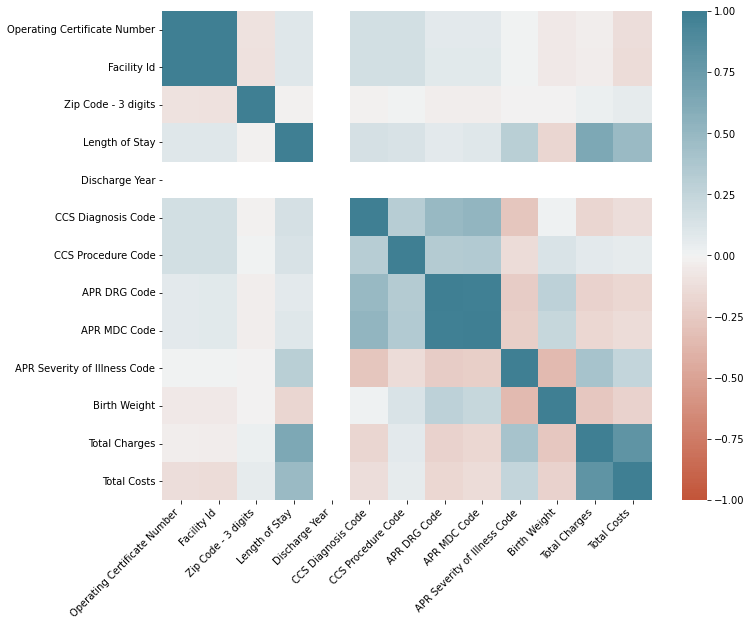

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(11, 9))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Data Visualization





/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


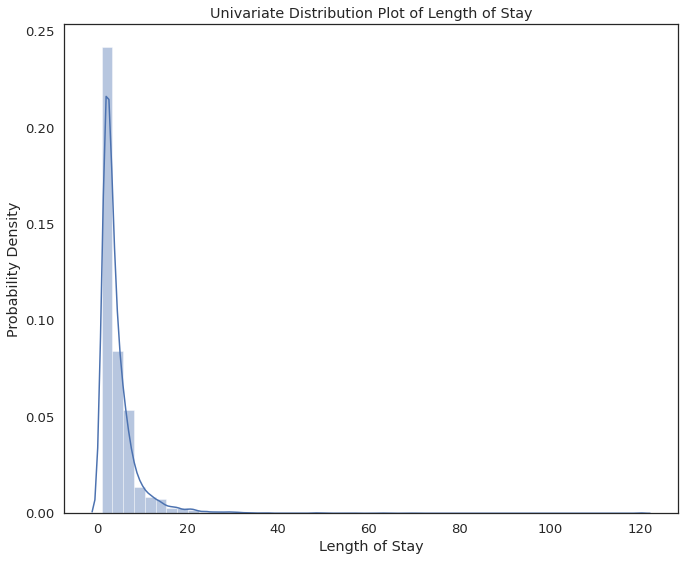

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sns.distplot(df['Length of Stay'], norm_hist=False);
plt.ylabel('Probability Density')
plt.title('Univariate Distribution Plot of Length of Stay')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


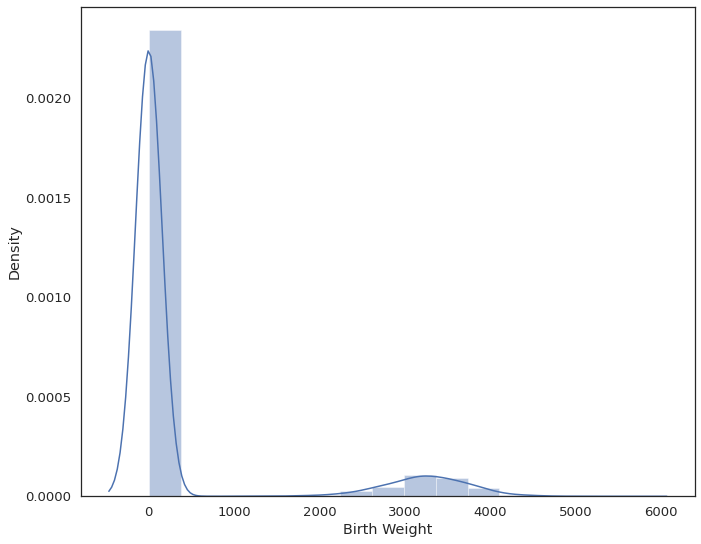

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
sns.distplot(df['Birth Weight'], bins=15);

<ipython-input-20-70765c44051b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth_youngest_stay['Birth Weight'] = birth_youngest_stay['Birth Weight'].apply(lambda x: float(x/454)) #convert from grams to pounds


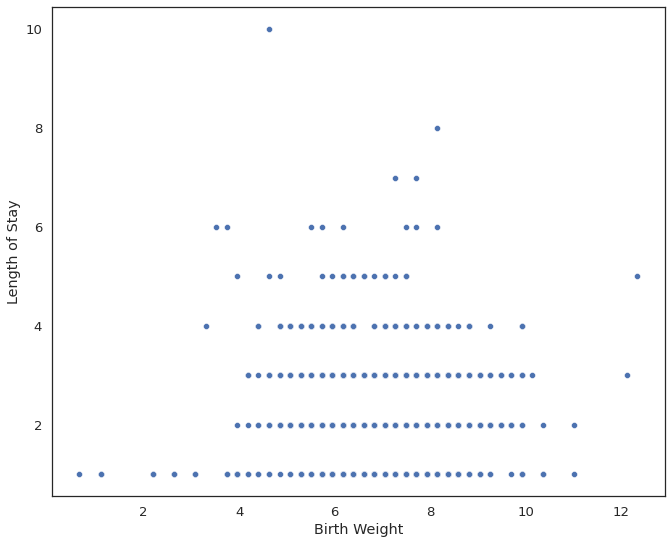

In [ ]:
# relationship between birth weight and length of stay 

birth_youngest_stay = df[df['Type of Admission'].str.contains('Newborn')]
birth_youngest_stay['Birth Weight'] = birth_youngest_stay['Birth Weight'].apply(lambda x: float(x/454)) #convert from grams to pounds
f, ax = plt.subplots(figsize=(11, 9))
sns.scatterplot(x="Birth Weight", y="Length of Stay",
                data=birth_youngest_stay)


[(0.0, 30.0)]

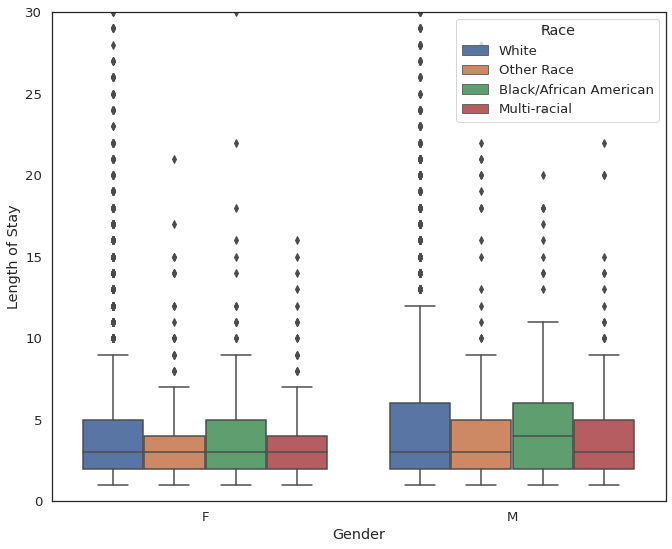

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Gender", y="Length of Stay",
            hue="Race",
            data=df)
ax.set(ylim=(0, 30))

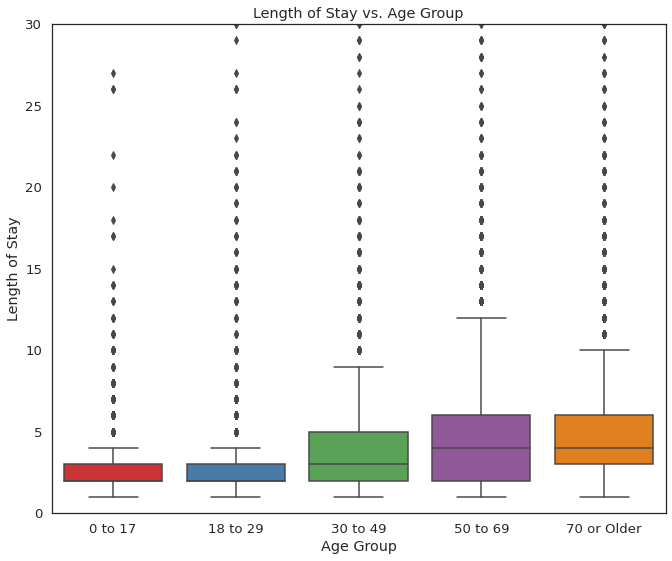

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Age Group", y="Length of Stay", order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'],
            palette="Set1", data=df)
ax.set(ylim=(0, 30))
plt.title('Length of Stay vs. Age Group')
plt.show()

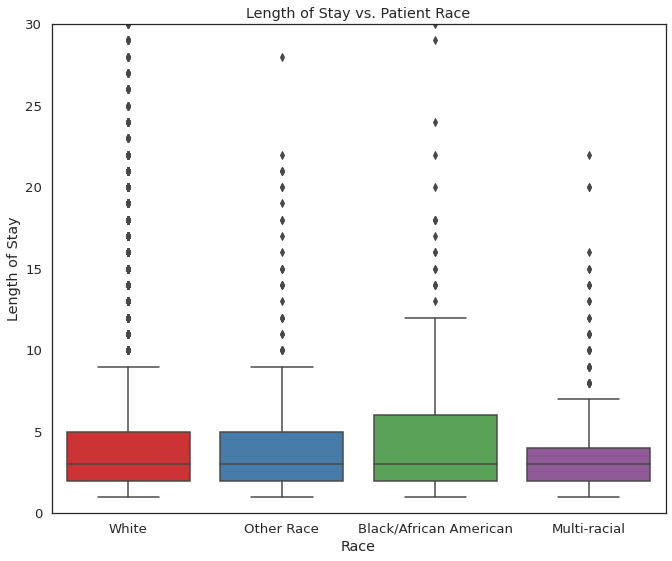

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Race", y="Length of Stay", data=df, palette='Set1')
plt.title('Length of Stay vs. Patient Race')
ax.set(ylim=(0, 30))
plt.show()

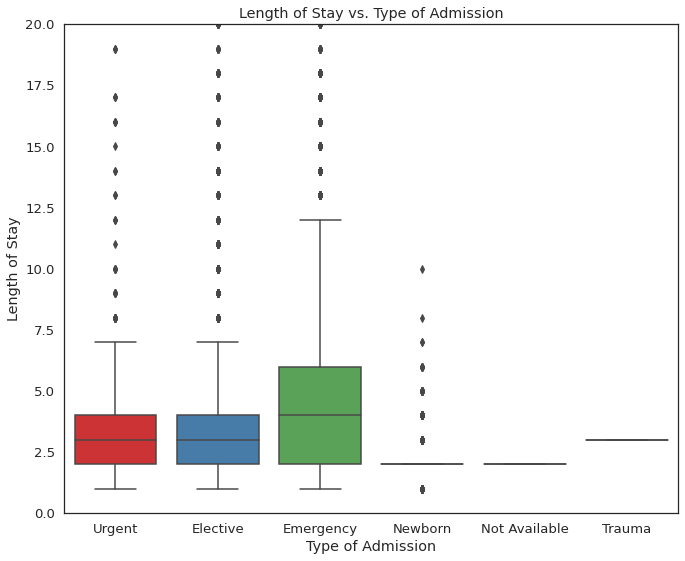

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Type of Admission", y="Length of Stay",
            data=df, palette='Set1')
plt.title('Length of Stay vs. Type of Admission')
ax.set(ylim=(0, 20))
plt.show()

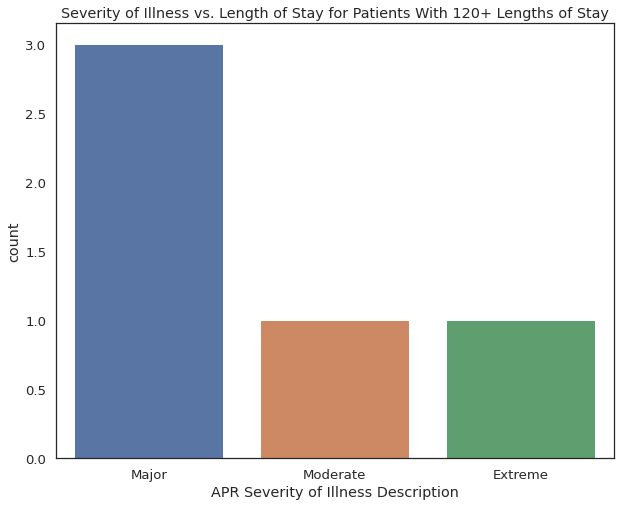

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='APR Severity of Illness Description', data = df[df['Length of Stay']==120])
plt.title('Severity of Illness vs. Length of Stay for Patients With 120+ Lengths of Stay')
plt.show()
